In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "trentino-alto adige"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,1,1,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,30.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,25.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2020-12-25T17:00:00,4,Trentino-Alto Adige,453,68,521,11820,12341,1488,336,...,12.0,5001.0,1748.0,1516.0,13.05,4.22,6.72,19.22,3.03,13.71
305,2020-12-26T17:00:00,4,Trentino-Alto Adige,486,65,551,11741,12292,-49,148,...,12.0,1723.0,-500.0,-79.0,11.80,4.48,8.59,-29.60,-4.41,-0.40
306,2020-12-27T17:00:00,4,Trentino-Alto Adige,510,65,575,11780,12355,63,143,...,7.0,1376.0,337.0,39.0,11.30,4.65,10.39,42.43,0.00,0.51
307,2020-12-28T17:00:00,4,Trentino-Alto Adige,527,65,592,11836,12428,73,219,...,14.0,1850.0,552.0,56.0,10.98,4.76,11.84,39.67,0.00,0.59


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 29, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 266
Nuovi tamponi: 2852.0
Percentuale nuovi positivi/nuovi tamponi: 9.3 %
Nuovi guariti: 237.0
Nuovi deceduti: 19.0
Variazione positivi ricoverati con sintomi: -11.0
Variazione positivi in terapia intensiva: 3.0
Variazione positivi in isolamento dimiciliare: 18.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 29, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-30T17:00:00,4,Trentino-Alto Adige,351,27,378,5872,6250,412,572,...,4.0,5384.0,1744.0,360.0,7.14,6.05,10.62,32.80,12.50,7.06
1,2020-10-31T17:00:00,4,Trentino-Alto Adige,358,27,385,6640,7025,775,937,...,5.0,6155.0,2245.0,768.0,7.01,5.48,15.22,41.74,0.00,12.40
2,2020-11-01T17:00:00,4,Trentino-Alto Adige,425,26,451,7280,7731,706,744,...,6.0,5441.0,1989.0,640.0,5.76,5.83,13.67,37.41,-3.70,10.05
3,2020-11-02T17:00:00,4,Trentino-Alto Adige,471,34,505,7724,8229,498,624,...,7.0,3216.0,1323.0,444.0,6.73,6.14,19.40,47.17,30.77,6.44
4,2020-11-03T17:00:00,4,Trentino-Alto Adige,487,40,527,8287,8814,585,607,...,4.0,4113.0,1254.0,563.0,7.59,5.98,14.76,48.41,17.65,7.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-25T17:00:00,4,Trentino-Alto Adige,453,68,521,11820,12341,1488,336,...,12.0,5001.0,1748.0,1516.0,13.05,4.22,6.72,19.22,3.03,13.71
57,2020-12-26T17:00:00,4,Trentino-Alto Adige,486,65,551,11741,12292,-49,148,...,12.0,1723.0,-500.0,-79.0,11.80,4.48,8.59,-29.60,-4.41,-0.40
58,2020-12-27T17:00:00,4,Trentino-Alto Adige,510,65,575,11780,12355,63,143,...,7.0,1376.0,337.0,39.0,11.30,4.65,10.39,42.43,0.00,0.51
59,2020-12-28T17:00:00,4,Trentino-Alto Adige,527,65,592,11836,12428,73,219,...,14.0,1850.0,552.0,56.0,10.98,4.76,11.84,39.67,0.00,0.59


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

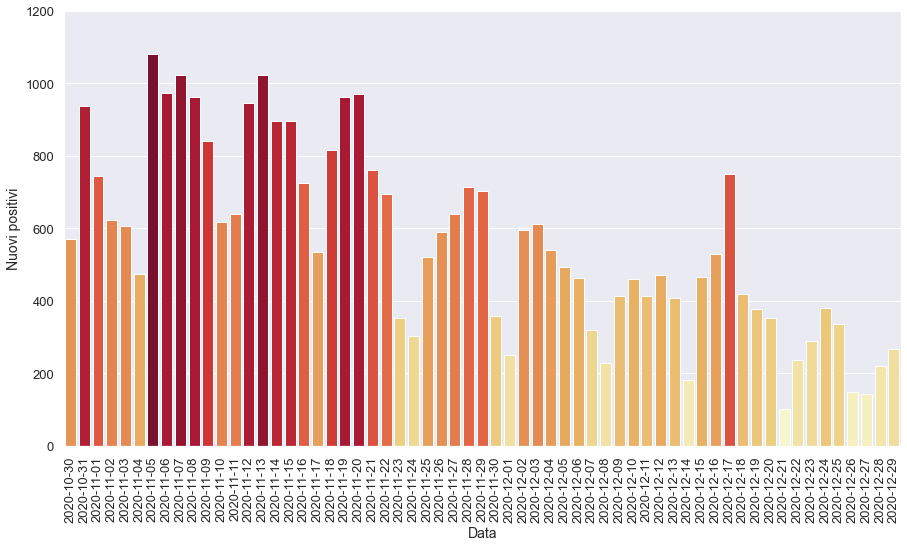

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

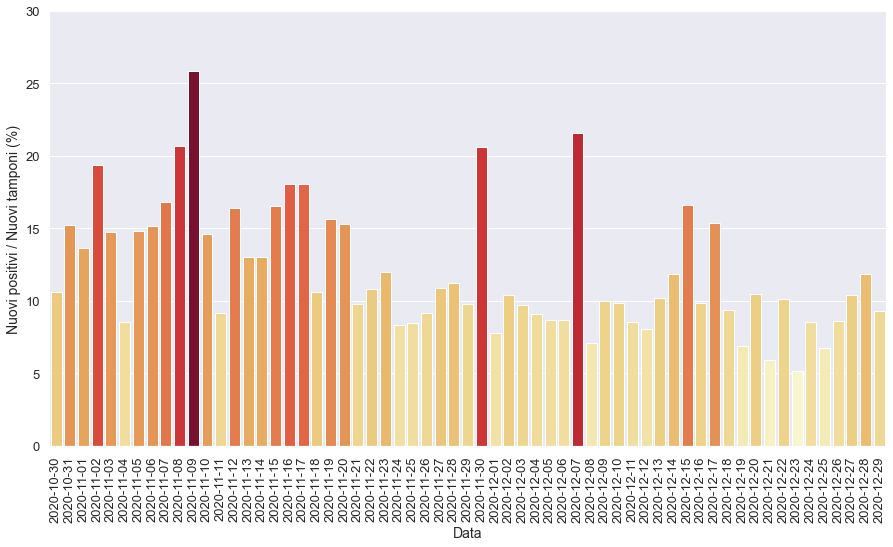

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

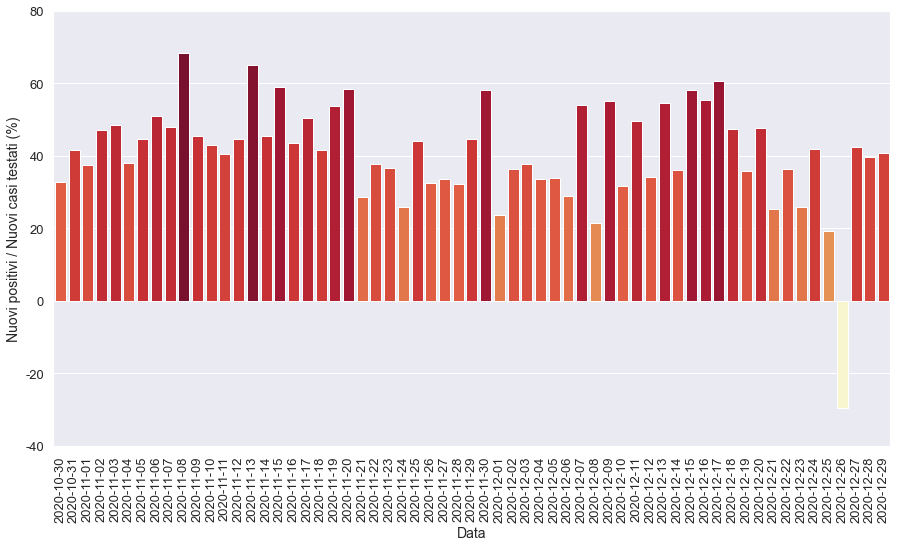

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

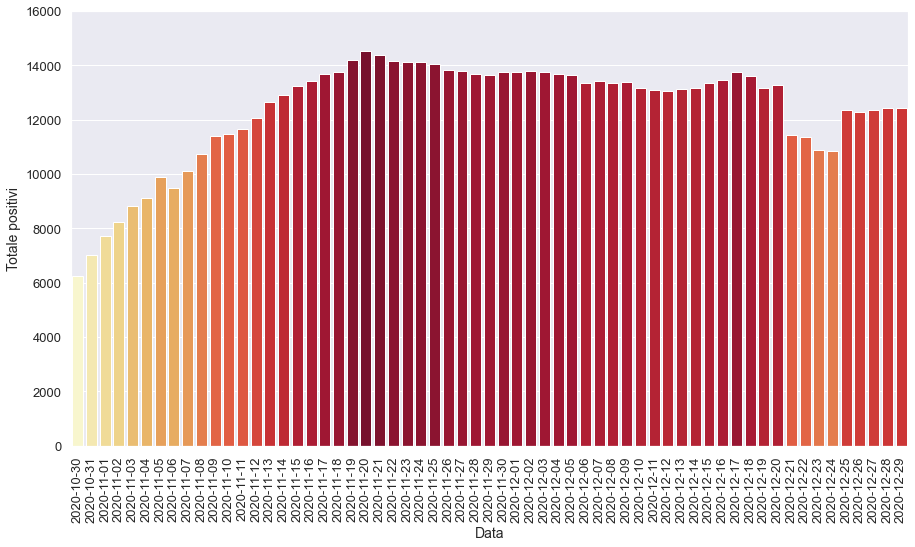

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

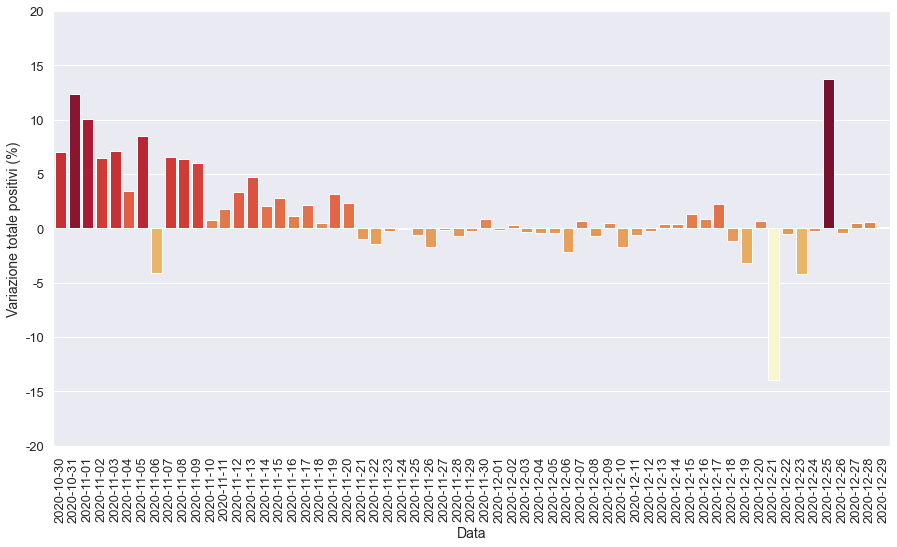

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

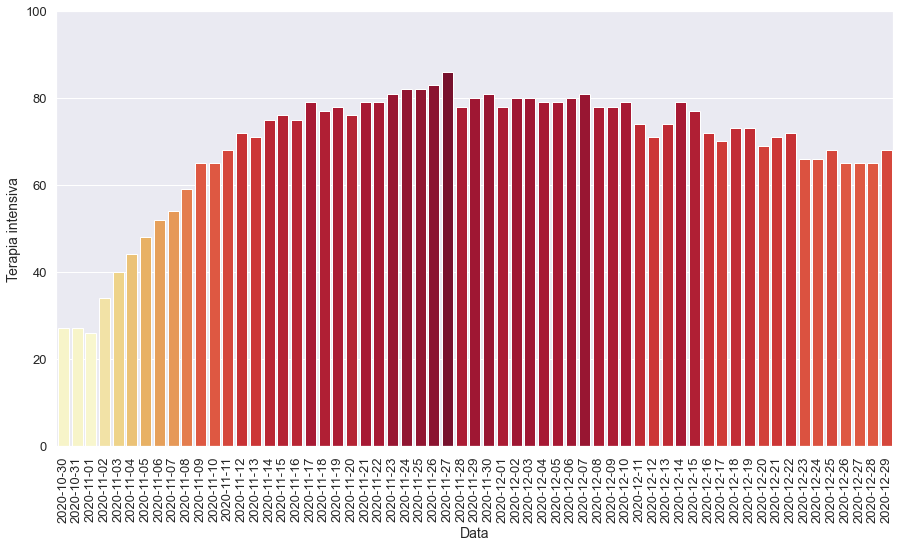

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

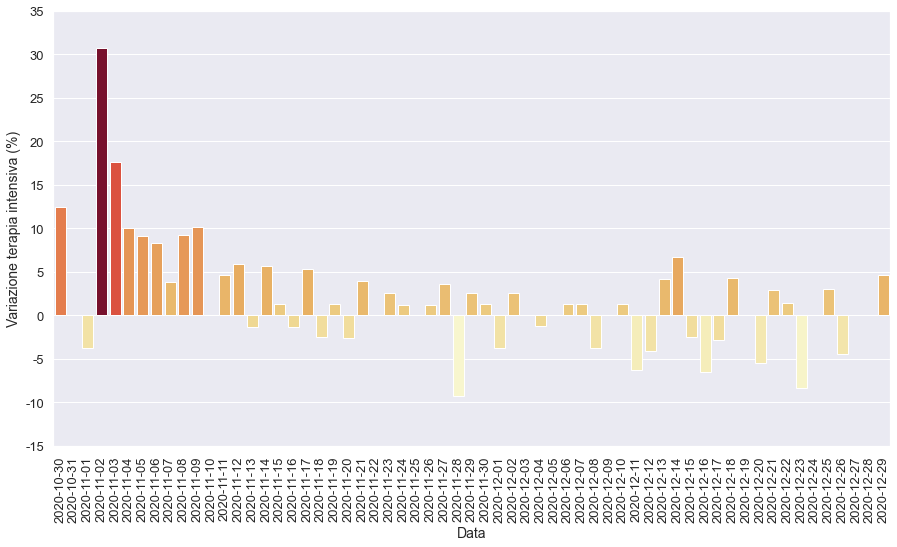

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

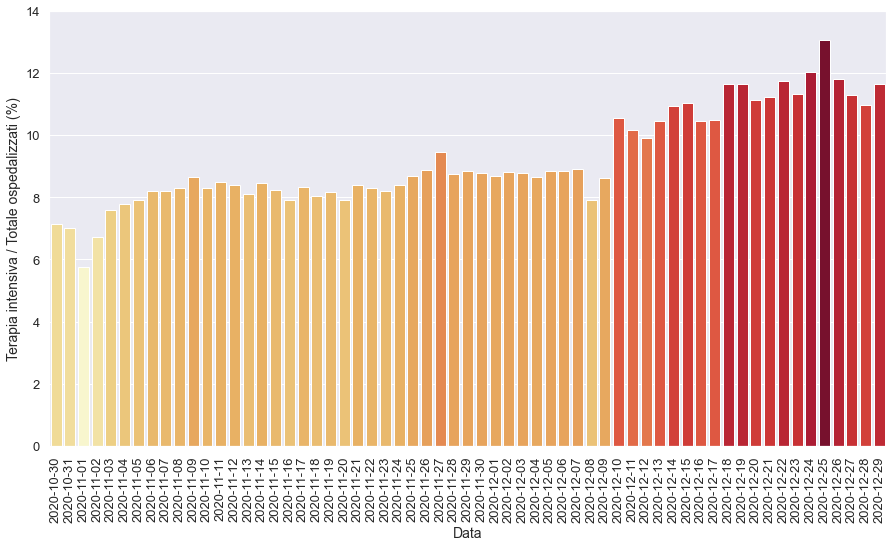

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

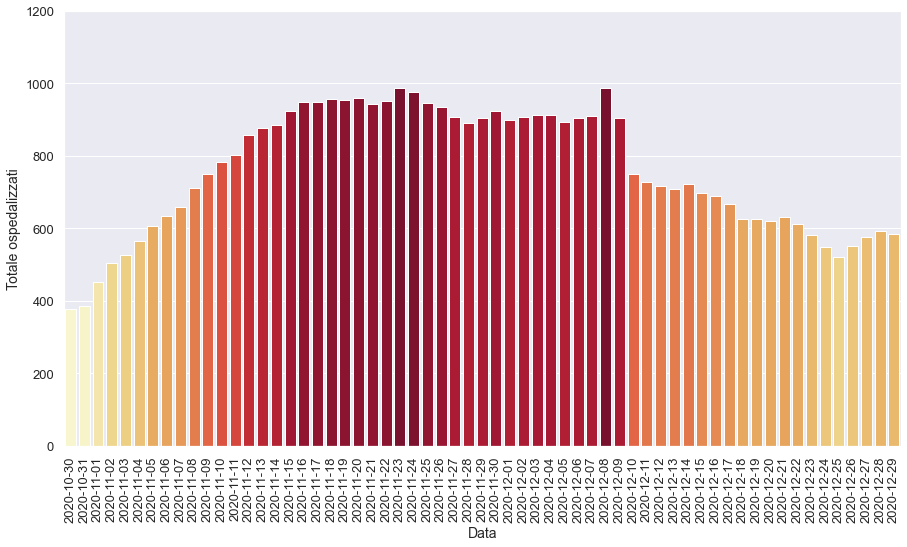

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

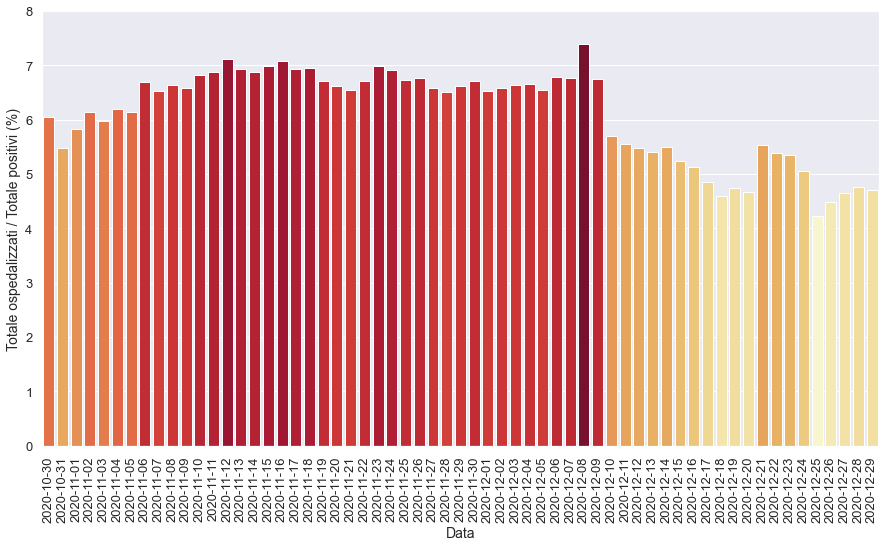

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

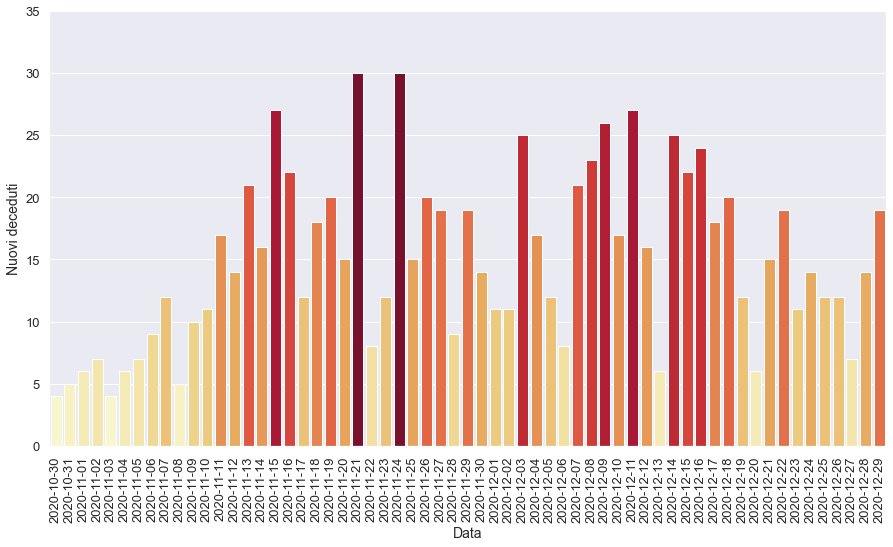

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

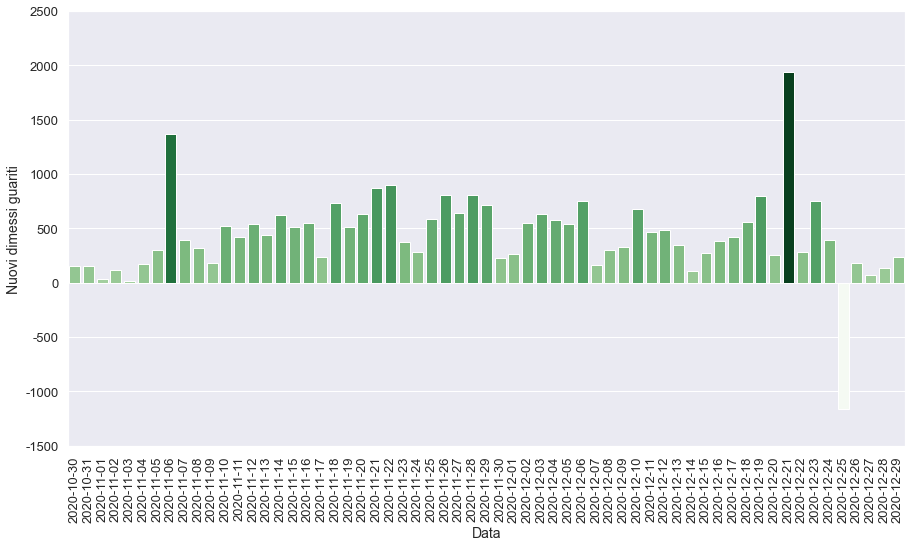

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-29T17:00:00,4,Trentino-Alto Adige,824,80,904,12752,13656,-35,702,...,19.0,7177.0,1569.0,-48.0,8.85,6.62,9.78,44.74,2.56,-0.26
1,2020-11-30T17:00:00,4,Trentino-Alto Adige,843,81,924,12846,13770,114,359,...,14.0,1739.0,617.0,94.0,8.77,6.71,20.64,58.18,1.25,0.83
2,2020-12-01T17:00:00,4,Trentino-Alto Adige,820,78,898,12851,13749,-21,250,...,11.0,3210.0,1054.0,5.0,8.69,6.53,7.79,23.72,-3.70,-0.15
3,2020-12-02T17:00:00,4,Trentino-Alto Adige,828,80,908,12880,13788,39,595,...,11.0,5716.0,1641.0,29.0,8.81,6.59,10.41,36.26,2.56,0.28
4,2020-12-03T17:00:00,4,Trentino-Alto Adige,832,80,912,12835,13747,-41,613,...,25.0,6293.0,1619.0,-45.0,8.77,6.63,9.74,37.86,0.00,-0.30
5,2020-12-04T17:00:00,4,Trentino-Alto Adige,833,79,912,12780,13692,-55,540,...,17.0,5940.0,1611.0,-55.0,8.66,6.66,9.09,33.52,-1.25,-0.40
6,2020-12-05T17:00:00,4,Trentino-Alto Adige,814,79,893,12738,13631,-61,492,...,12.0,5664.0,1454.0,-42.0,8.85,6.55,8.69,33.84,0.00,-0.45
7,2020-12-06T17:00:00,4,Trentino-Alto Adige,824,80,904,12434,13338,-293,464,...,8.0,5367.0,1601.0,-304.0,8.85,6.78,8.65,28.98,1.27,-2.15
8,2020-12-07T17:00:00,4,Trentino-Alto Adige,828,81,909,12525,13434,96,320,...,21.0,1481.0,593.0,91.0,8.91,6.77,21.61,53.96,1.25,0.72
9,2020-12-08T17:00:00,4,Trentino-Alto Adige,909,78,987,12353,13340,-94,228,...,23.0,3227.0,1068.0,-172.0,7.90,7.40,7.07,21.35,-3.70,-0.70


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

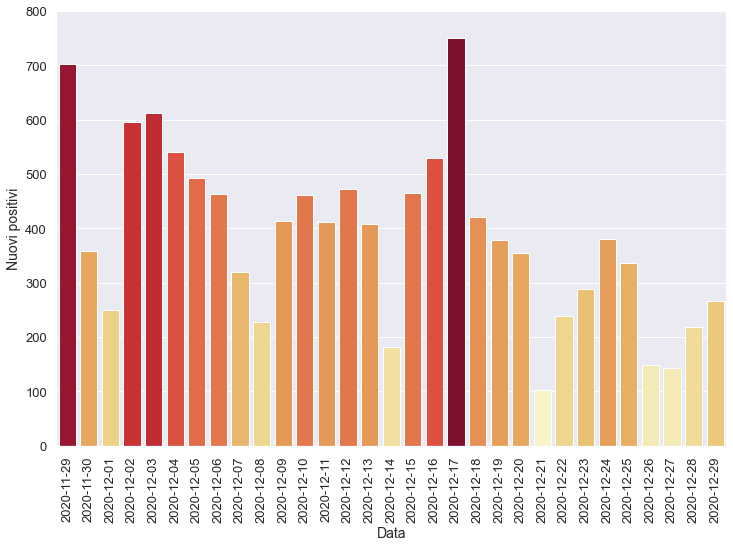

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

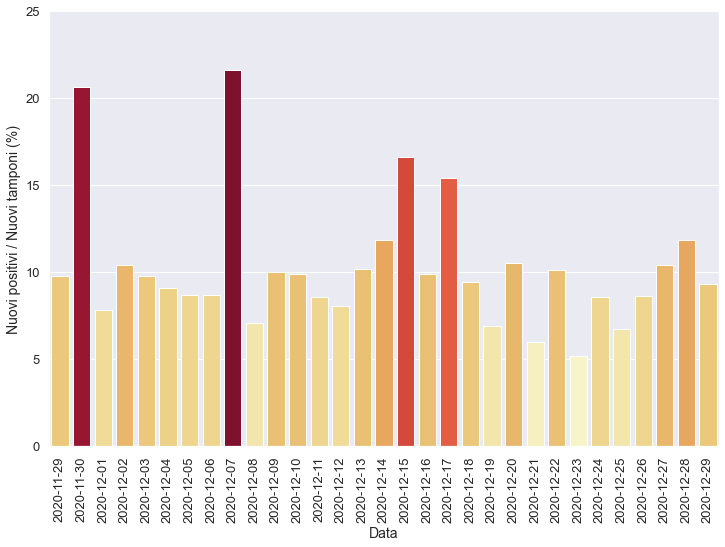

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

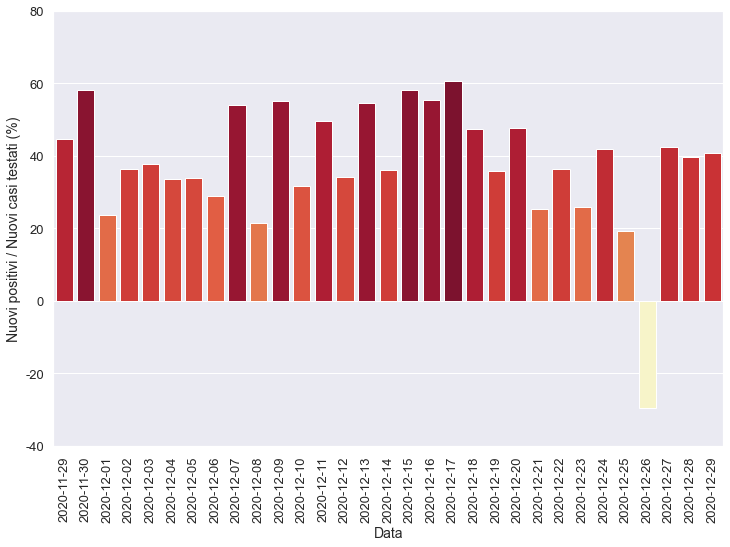

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

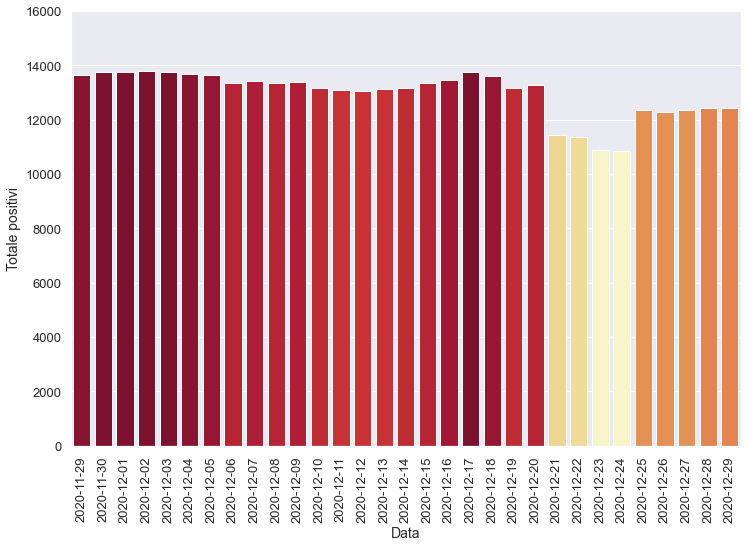

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

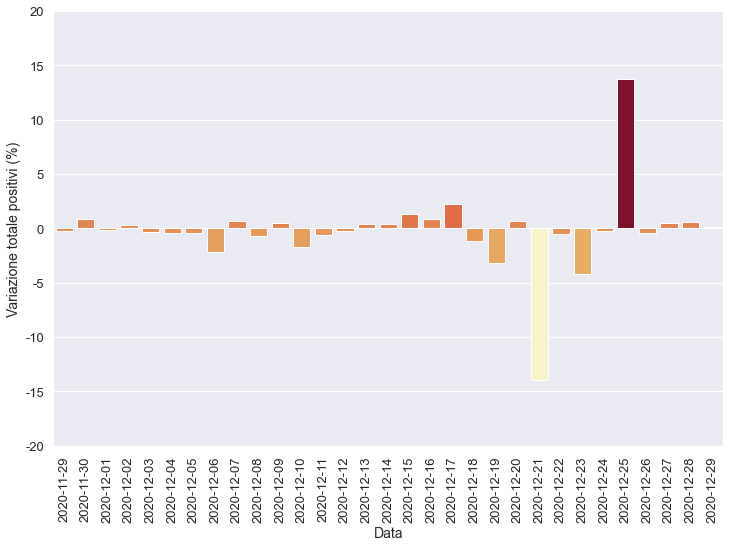

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

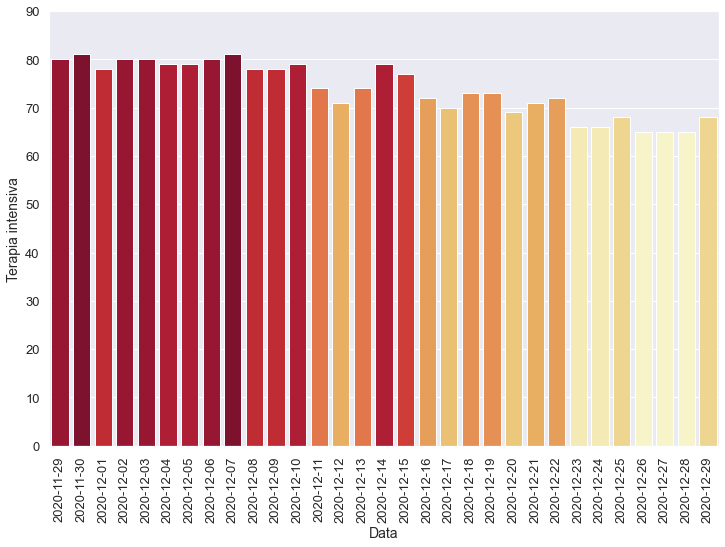

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

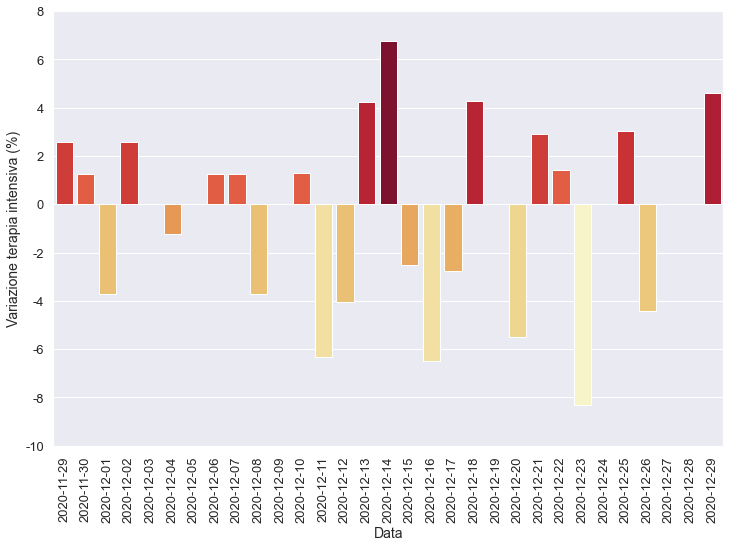

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

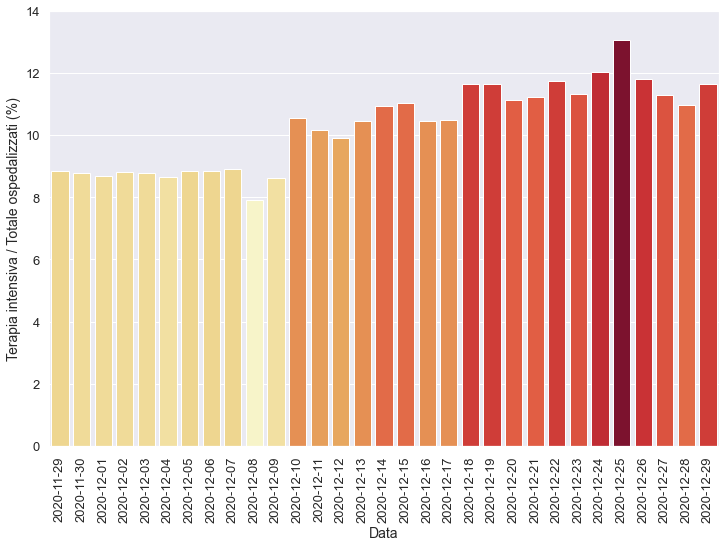

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

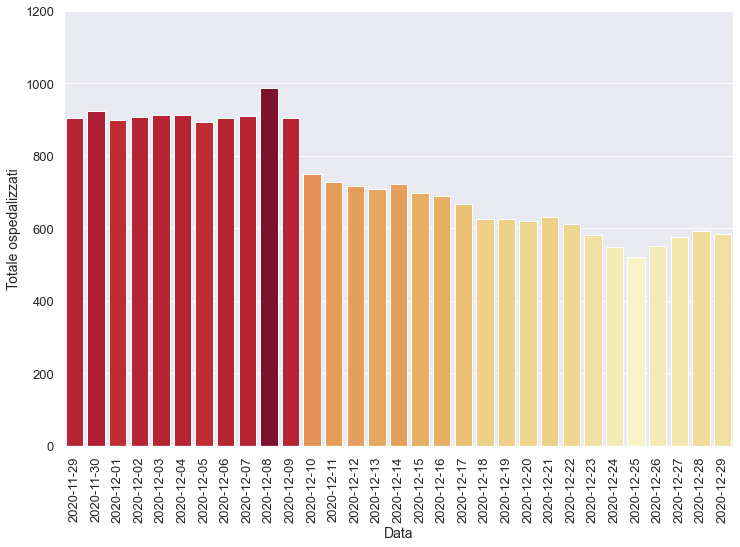

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

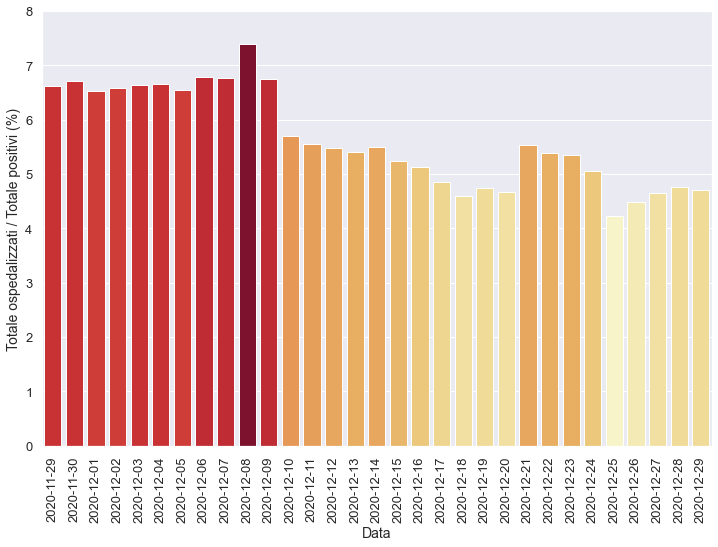

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

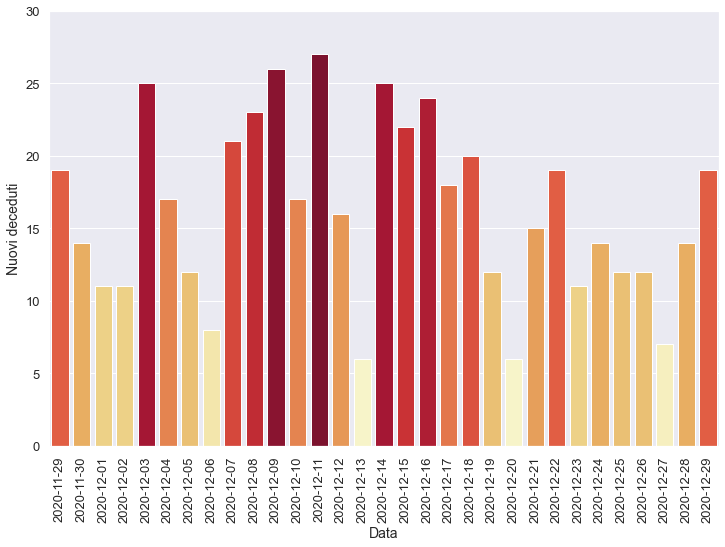

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

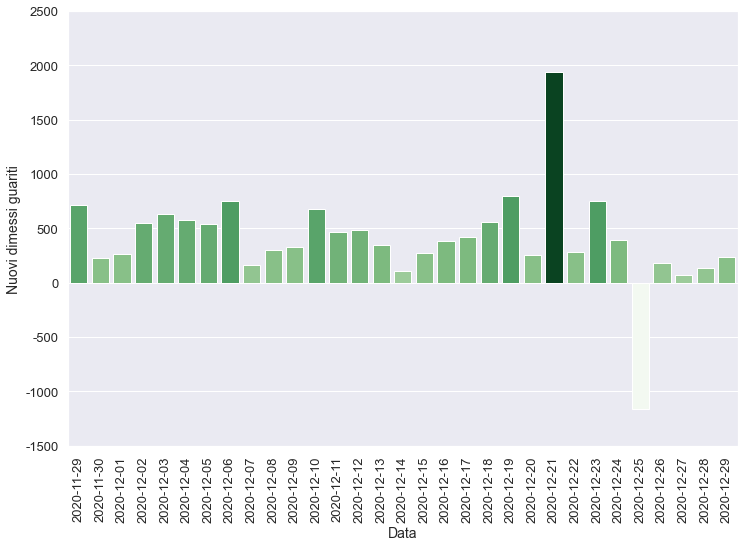

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-22T17:00:00,4,Trentino-Alto Adige,540,72,612,10746,11358,-61,238,...,19.0,2353.0,652.0,-41.0,11.76,5.39,10.11,36.50,1.41,-0.53
1,2020-12-23T17:00:00,4,Trentino-Alto Adige,516,66,582,10298,10880,-478,288,...,11.0,5587.0,1112.0,-448.0,11.34,5.35,5.15,25.90,-8.33,-4.21
2,2020-12-24T17:00:00,4,Trentino-Alto Adige,483,66,549,10304,10853,-27,380,...,14.0,4451.0,905.0,6.0,12.02,5.06,8.54,41.99,0.00,-0.25
3,2020-12-25T17:00:00,4,Trentino-Alto Adige,453,68,521,11820,12341,1488,336,...,12.0,5001.0,1748.0,1516.0,13.05,4.22,6.72,19.22,3.03,13.71
4,2020-12-26T17:00:00,4,Trentino-Alto Adige,486,65,551,11741,12292,-49,148,...,12.0,1723.0,-500.0,-79.0,11.80,4.48,8.59,-29.60,-4.41,-0.40
5,2020-12-27T17:00:00,4,Trentino-Alto Adige,510,65,575,11780,12355,63,143,...,7.0,1376.0,337.0,39.0,11.30,4.65,10.39,42.43,0.00,0.51
6,2020-12-28T17:00:00,4,Trentino-Alto Adige,527,65,592,11836,12428,73,219,...,14.0,1850.0,552.0,56.0,10.98,4.76,11.84,39.67,0.00,0.59
7,2020-12-29T17:00:00,4,Trentino-Alto Adige,516,68,584,11854,12438,10,266,...,19.0,2852.0,654.0,18.0,11.64,4.70,9.33,40.67,4.62,0.08


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

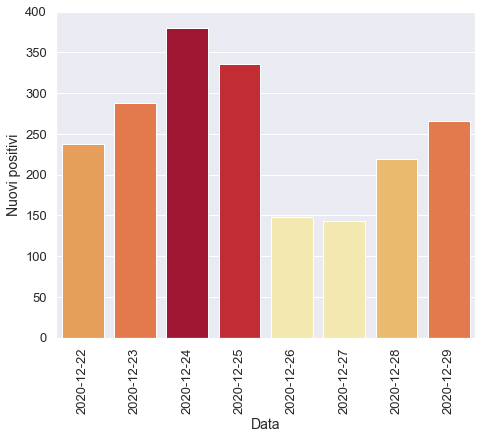

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

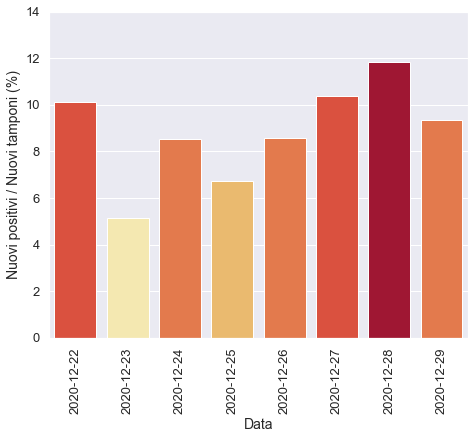

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

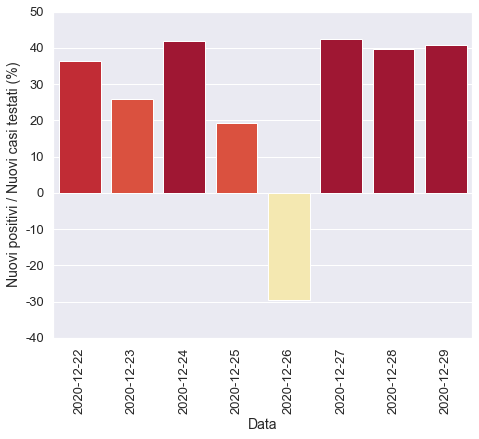

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

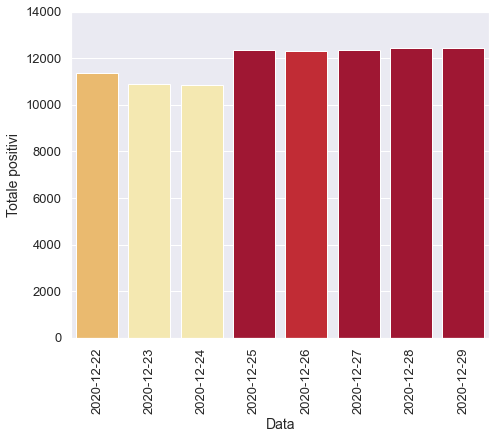

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

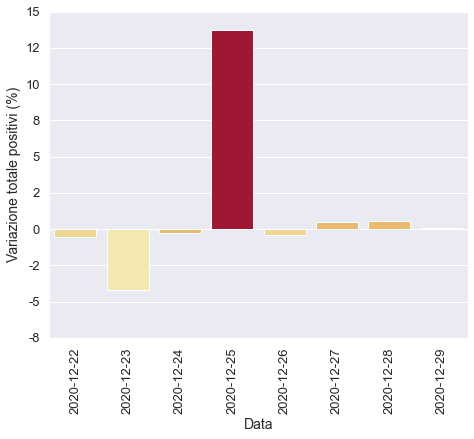

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

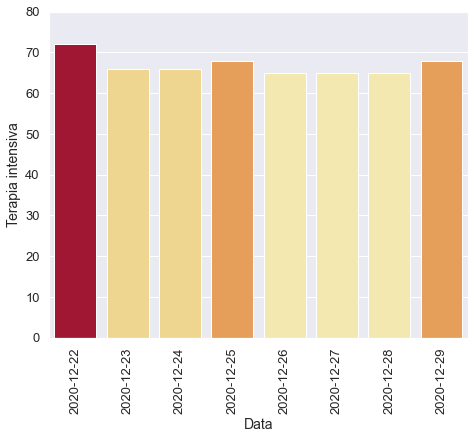

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

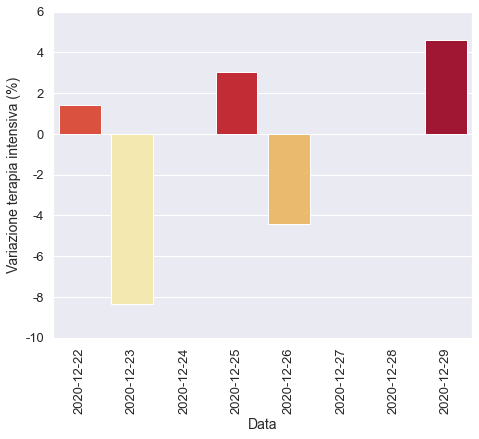

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

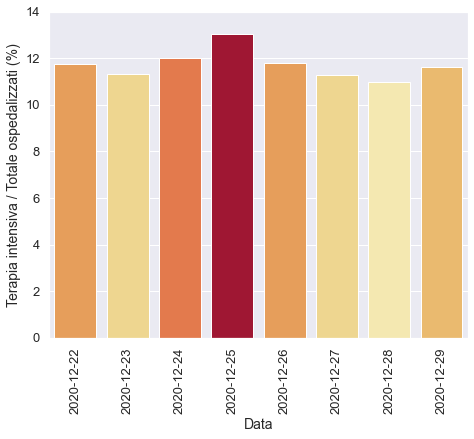

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

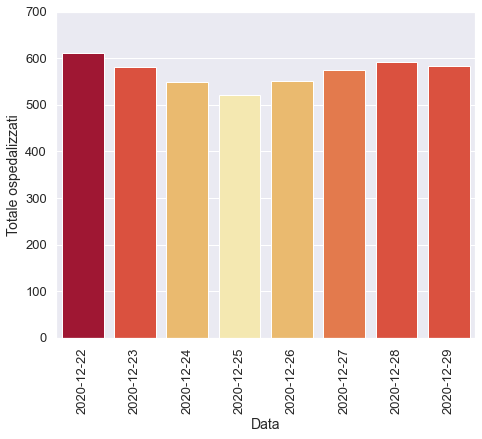

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

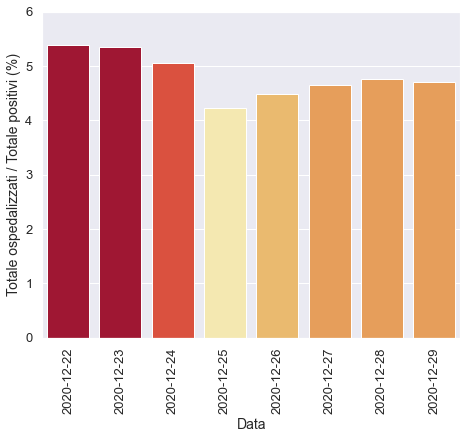

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

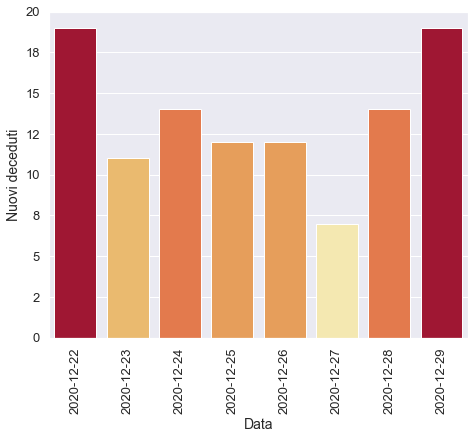

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

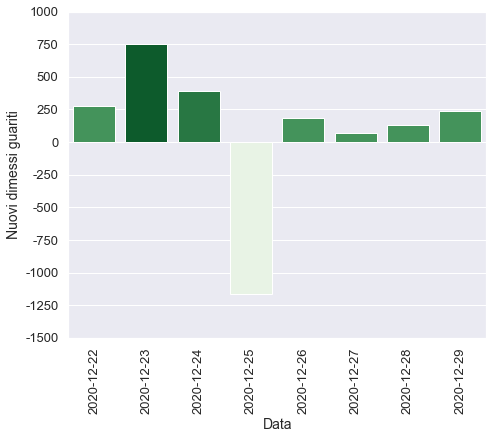

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)